In [381]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [382]:
first_path = os.getcwd()

In [383]:
os.chdir(first_path)
dataset_link = "https://www.kaggle.com/competitions/udea-ai-4-eng-20252-pruebas-saber-pro-colombia/overview"
old_name = "udea-ai-4-eng-20252-pruebas-saber-pro-colombia"
new_name = "data"

# ejecutar si la carpeta "data" no existe
if not os.path.exists(new_name):
    od.download(dataset_link)
    if os.path.exists(old_name):
        os.rename(old_name, new_name)
    else:
        print(f"No se encontró la carpeta {old_name} después de la descarga")
else:
    print(f"La carpeta '{new_name}' ya existe")


La carpeta 'data' ya existe


In [384]:
# moverse a la carpeta
os.chdir(new_name)
print(os.listdir())
archivo = "train.csv"
data = pd.read_csv(archivo)
os.chdir("../") # volvemos a la carpeta de todo el repositorio

['submission_example.csv', 'test.csv', 'train.csv']


<center>

**Comprobar como se ven los datos**

</center>

In [385]:
pd.set_option("display.max_columns", None) # Visualizar todas las columnas
data.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

In [387]:
data.nunique()

ID                             692500
PERIODO_ACADEMICO                   9
E_PRGM_ACADEMICO                  948
E_PRGM_DEPARTAMENTO                31
E_VALORMATRICULAUNIVERSIDAD         8
E_HORASSEMANATRABAJA                5
F_ESTRATOVIVIENDA                   7
F_TIENEINTERNET                     2
F_EDUCACIONPADRE                   12
F_TIENELAVADORA                     2
F_TIENEAUTOMOVIL                    2
E_PRIVADO_LIBERTAD                  2
E_PAGOMATRICULAPROPIO               2
F_TIENECOMPUTADOR                   2
F_TIENEINTERNET.1                   2
F_EDUCACIONMADRE                   12
RENDIMIENTO_GLOBAL                  4
INDICADOR_1                       375
INDICADOR_2                       342
INDICADOR_3                       196
INDICADOR_4                       276
dtype: int64

In [388]:
len(data.columns)

21

<center>

**Análisis y preprocesamiento**

</center>

Cuando se hizo el **EDA** en el anterior notebook **01-exploración.ipynb**, una de las características que más faciles serán de tratar, es F_TIENEINTERNET, quien tiene otra que es exactamente igual (F_TIENEINTERNET-1), asi que podemos eliminarla, por otra parte, la variable **ID** solo es un codigo de identificación del estudiante, y todos son diferentes, por lo que al no aportar información ni ningun tipo de patrón, podemos deshacernos también de esta.

In [389]:
data = data.drop(columns=["F_TIENEINTERNET.1", "ID"])
data.head()

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [390]:
len(data.columns)

19

In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PERIODO_ACADEMICO            692500 non-null  int64  
 1   E_PRGM_ACADEMICO             692500 non-null  object 
 2   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 3   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 4   E_HORASSEMANATRABAJA         661643 non-null  object 
 5   F_ESTRATOVIVIENDA            660363 non-null  object 
 6   F_TIENEINTERNET              665871 non-null  object 
 7   F_EDUCACIONPADRE             669322 non-null  object 
 8   F_TIENELAVADORA              652727 non-null  object 
 9   F_TIENEAUTOMOVIL             648877 non-null  object 
 10  E_PRIVADO_LIBERTAD           692500 non-null  object 
 11  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 12  F_TIENECOMPUTADOR            654397 non-null  object 
 13 

In [392]:
col_nan = data.columns[data.isna().any()]
for i in range(len(col_nan)):
    print(f"Porcentaje de datos faltantes para la variable {col_nan[i]} => { round((int(data[[col_nan[i]]].isna().sum().sum())/len(data) * 100), 4) }%")

Porcentaje de datos faltantes para la variable E_VALORMATRICULAUNIVERSIDAD => 0.9079%
Porcentaje de datos faltantes para la variable E_HORASSEMANATRABAJA => 4.4559%
Porcentaje de datos faltantes para la variable F_ESTRATOVIVIENDA => 4.6407%
Porcentaje de datos faltantes para la variable F_TIENEINTERNET => 3.8453%
Porcentaje de datos faltantes para la variable F_EDUCACIONPADRE => 3.347%
Porcentaje de datos faltantes para la variable F_TIENELAVADORA => 5.7434%
Porcentaje de datos faltantes para la variable F_TIENEAUTOMOVIL => 6.2994%
Porcentaje de datos faltantes para la variable E_PAGOMATRICULAPROPIO => 0.9383%
Porcentaje de datos faltantes para la variable F_TIENECOMPUTADOR => 5.5022%
Porcentaje de datos faltantes para la variable F_EDUCACIONMADRE => 3.4172%


 Se observa que la cantidad de datos faltantes de cada variable no es superior a 7% en ninguna de ellas, además, todas las caracteristicas que aqui aparecen **NO SON NUMÉRICAS** por lo que se hará imputación de datos por medio de la moda.

### Visualizamos la distribución de estos datos antes de imputar

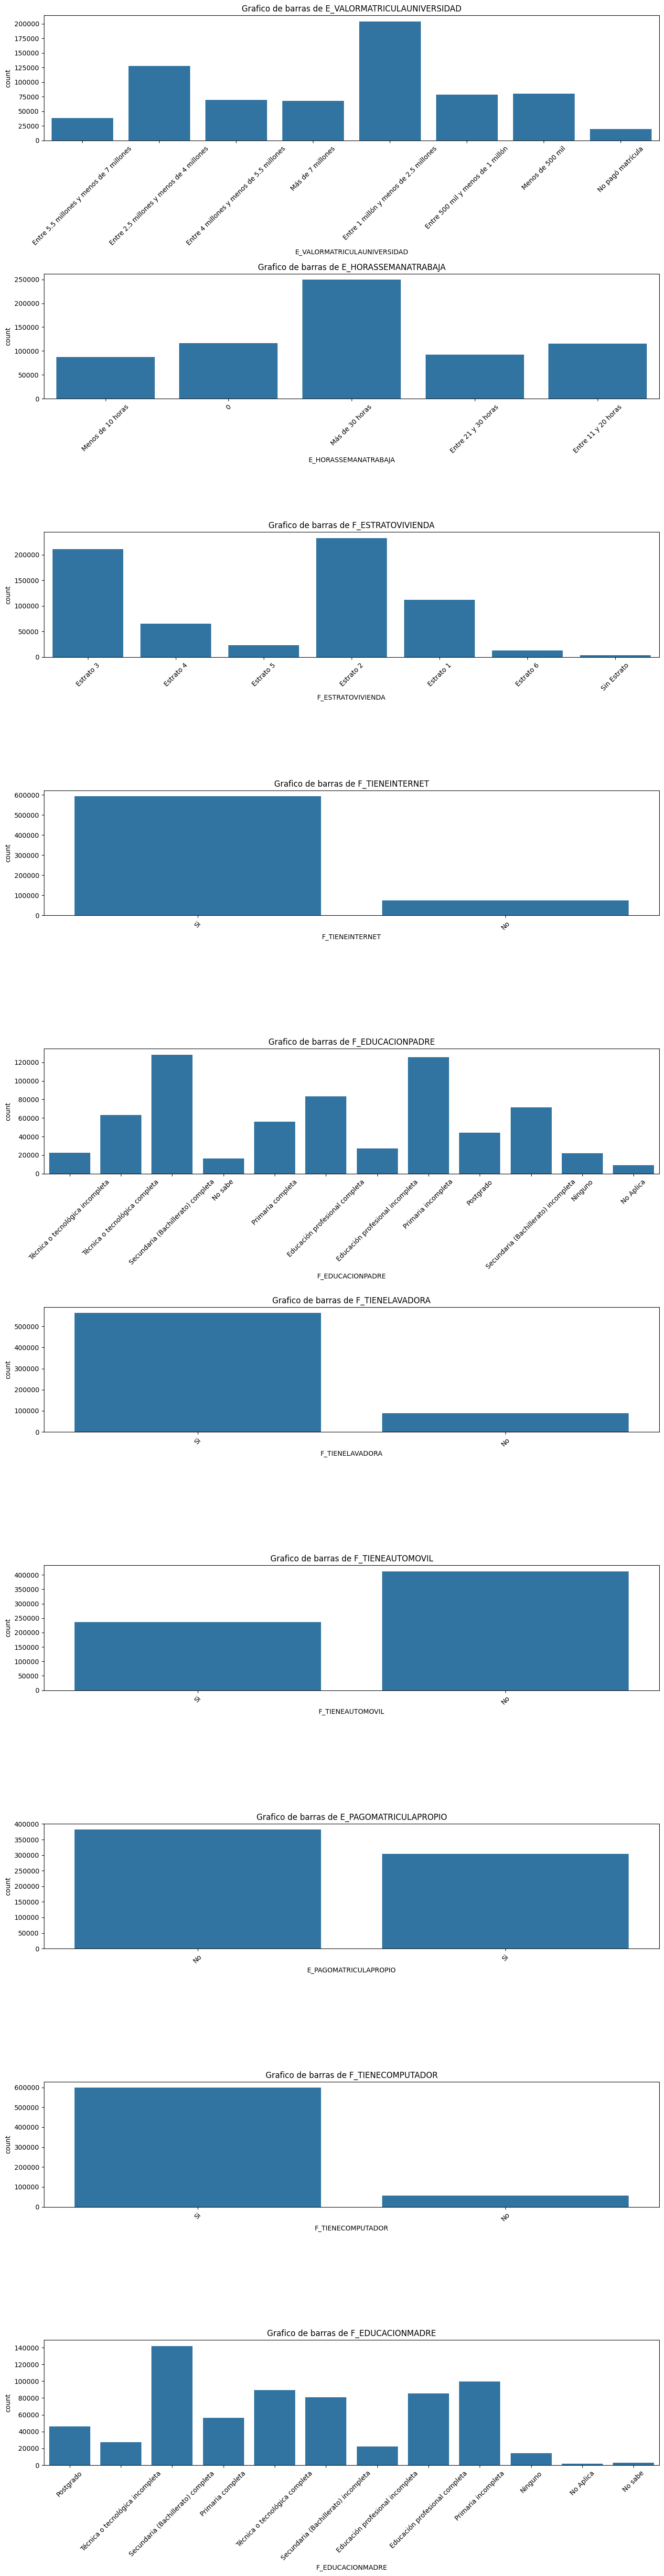

In [393]:
fig, axes = plt.subplots(10, 1, figsize=(14,54))
axes = axes.flatten()
for i in range(len(col_nan)):
    sns.countplot(data=data, x = col_nan[i], ax = axes[i])
    axes[i].tick_params("x", rotation=45)
    axes[i].set_title(f"Grafico de barras de {col_nan[i]}")
    axes[i].set_xlabel(f"{col_nan[i]}")
plt.tight_layout()
plt.show()

In [394]:
for i in range(len(col_nan)):
    moda = data[col_nan[i]].mode()[0]
    data[col_nan[i]] = data[col_nan[i]].fillna(moda)

In [395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PERIODO_ACADEMICO            692500 non-null  int64  
 1   E_PRGM_ACADEMICO             692500 non-null  object 
 2   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 3   E_VALORMATRICULAUNIVERSIDAD  692500 non-null  object 
 4   E_HORASSEMANATRABAJA         692500 non-null  object 
 5   F_ESTRATOVIVIENDA            692500 non-null  object 
 6   F_TIENEINTERNET              692500 non-null  object 
 7   F_EDUCACIONPADRE             692500 non-null  object 
 8   F_TIENELAVADORA              692500 non-null  object 
 9   F_TIENEAUTOMOVIL             692500 non-null  object 
 10  E_PRIVADO_LIBERTAD           692500 non-null  object 
 11  E_PAGOMATRICULAPROPIO        692500 non-null  object 
 12  F_TIENECOMPUTADOR            692500 non-null  object 
 13 

### Ahora se visualiza la distribución de estos datos luego de la imputación

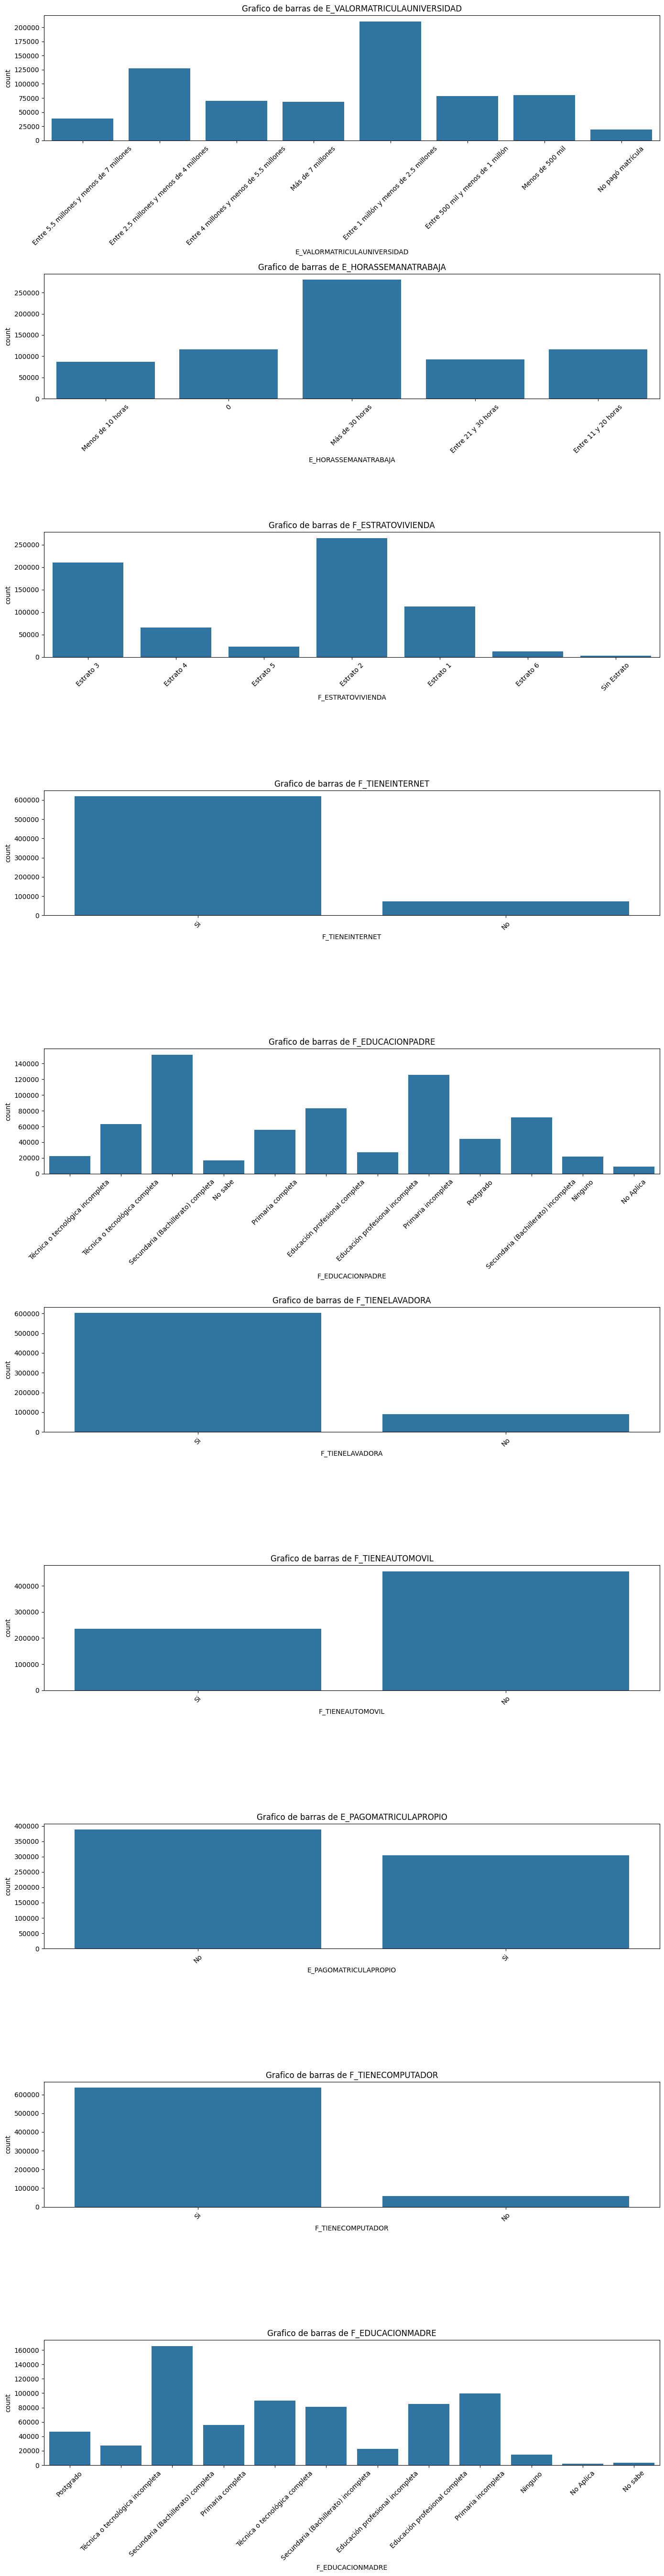

In [396]:
fig, axes = plt.subplots(10, 1, figsize=(14,54))
axes = axes.flatten()
for i in range(len(col_nan)):
    sns.countplot(data=data, x = col_nan[i], ax = axes[i])
    axes[i].tick_params("x", rotation=45)
    axes[i].set_title(f"Grafico de barras de {col_nan[i]}")
    axes[i].set_xlabel(f"{col_nan[i]}")
plt.tight_layout()
plt.show()

Vemos que claramente la escala de los datos fue aumentada, pero su distribución (por ser la moda) no cambió

Ahora haremos **One-Hot-Encoding** con las variables binarias, F_TIENEINTERNET, F_TIENELAVADORA, E_PAGOMATRICULAPROPIO, F_TIENEAUTOMOVIL, E_PRIVADO_LIBERTAD y F_TIENECOMPUTADOR. Para la característica RENDIMIENTO_GLOBAL se codificarán sus valores de bajo, medio-bajo, medio-alto y alto como 0, 1, 2 y 3 respectivamente y luego, para F_ESTRATOVIVIENDA se codifica con su nivel de estrato, es decir, estrato 1 será 1, estrato 2 ahora es 2 y asi sucesivamente, para el valor de "sin estrato" se codificará como 0.

Note que con el metodo get_dummies y su parametro drop_first evitamos crear columnas extras, esto facilitará el analísis a futuro junto con la implementación del modelo.

In [397]:
data = pd.get_dummies(data, columns=["F_TIENEINTERNET", "F_TIENELAVADORA", "E_PAGOMATRICULAPROPIO", "F_TIENEAUTOMOVIL", "E_PRIVADO_LIBERTAD", "F_TIENECOMPUTADOR"], drop_first=True, dummy_na=False, dtype="int8")
cambios = {'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3}
data["RENDIMIENTO_GLOBAL"] = data['RENDIMIENTO_GLOBAL'].map(cambios).astype('int8')
cambios = {'Sin Estrato': 0, 'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6}
data["F_ESTRATOVIVIENDA"] = data["F_ESTRATOVIVIENDA"].map(cambios).astype('int8')

# volvamos a poner el nombre original de las variables
data.columns = data.columns.str.replace(r'_(?:S[ií]|S)?$', '', regex=True)
data.head()

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,F_TIENEINTERNET,F_TIENELAVADORA,E_PAGOMATRICULAPROPIO,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,F_TIENECOMPUTADOR
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,3,Técnica o tecnológica incompleta,Postgrado,2,0.322,0.208,0.310,0.267,1,1,0,1,0,1
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,3,Técnica o tecnológica completa,Técnica o tecnológica incompleta,0,0.311,0.215,0.292,0.264,0,1,0,0,0,1
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,0,0.297,0.214,0.305,0.264,1,1,0,0,0,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,4,No sabe,Secundaria (Bachillerato) completa,3,0.485,0.172,0.252,0.190,1,1,0,0,0,1
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,3,Primaria completa,Primaria completa,1,0.316,0.232,0.285,0.294,1,1,0,1,0,1


Ahora, debemos tratar los datos con sintaxis diferentes, por ejemplo, "INGENIERÍA INDUSTRIAL" e "INGENIERIA INDUSTRIAL", otro caso que se evidencia es "CONTADURÍA PÚBLICA" y "CONTADURIA PUBLICA" que son tomados como datos distintos, lo que haremos será eliminar espacios finales, eliminar acentos, quitar signos extraños, cambiar "de" por "en" (para casos como "ingenieria de telecomunicaciones" e "ingenieria en telecomunicaciones") y convertir a minúsculas.

In [398]:
col_fix = ["E_PRGM_ACADEMICO", "E_PRGM_DEPARTAMENTO", "F_EDUCACIONPADRE", "F_EDUCACIONMADRE"]
print("DATOS ANTES DE LIMPIAR SU SINTAXIS\n")
for i in range(len(col_fix)):
    print(f"Cantidad de valores unicos para la variable {data.columns[i]}: {data[col_fix[i]].nunique()}")

DATOS ANTES DE LIMPIAR SU SINTAXIS

Cantidad de valores unicos para la variable PERIODO_ACADEMICO: 948
Cantidad de valores unicos para la variable E_PRGM_ACADEMICO: 31
Cantidad de valores unicos para la variable E_PRGM_DEPARTAMENTO: 12
Cantidad de valores unicos para la variable E_VALORMATRICULAUNIVERSIDAD: 12


In [399]:
col_fix = ["E_PRGM_ACADEMICO", "E_PRGM_DEPARTAMENTO", "F_EDUCACIONPADRE", "F_EDUCACIONMADRE"]

for c in col_fix:
    s = data[c].astype("string")
    s = (s.str.normalize("NFKD").str.encode("ascii","ignore").str.decode("utf-8").str.lower().str.replace(r"[^a-z0-9 ]", " ", regex=True).str.replace(r"\s+", " ", regex=True).str.strip())
    s = s.str.replace(r"\bde\b", "en", regex=True)
    data[c] = s

In [400]:
print("DATOS LUEGO DE LIMPIAR SU SINTAXIS\n")
for i in range(len(col_fix)):
    print(f"Cantidad de valores unicos para la variable {data.columns[i]}: {data[col_fix[i]].nunique()}")

DATOS LUEGO DE LIMPIAR SU SINTAXIS

Cantidad de valores unicos para la variable PERIODO_ACADEMICO: 734
Cantidad de valores unicos para la variable E_PRGM_ACADEMICO: 31
Cantidad de valores unicos para la variable E_PRGM_DEPARTAMENTO: 12
Cantidad de valores unicos para la variable E_VALORMATRICULAUNIVERSIDAD: 12


Aunque parece que ya los datos han sido corregidos para tener una sintaxis estandar, aún queda mucho por arreglar, para visualizarlo podemos ver la frecuencia de los 50 datos que mas se repiten para ciertas carreras, por ejemplo ingenieria, comunicacion y contaduria.

In [401]:
col = "E_PRGM_ACADEMICO"

data_1 = data.loc[data[col].str.contains(r"\bingenieria\b", case=False, na=False), col] \
    .value_counts()

data_1.head(50)

E_PRGM_ACADEMICO
ingenieria industrial                                       34794
ingenieria civil                                            21315
ingenieria en sistemas                                      18028
ingenieria ambiental                                        13130
ingenieria mecanica                                          7271
ingenieria electronica                                       6804
ingenieria quimica                                           4142
ingenieria electrica                                         3019
ingenieria mecatronica                                       2754
ingenieria agronomica                                        2331
ingenieria en telecomunicaciones                             2205
ingenieria biomedica                                         1972
ingenieria en alimentos                                      1720
ingenieria electromecanica                                   1612
ingenieria en sistemas y computacion                       

In [402]:
col = "E_PRGM_ACADEMICO"

data_1 = data.loc[data[col].str.contains(r"\bcontaduria\b", case=False, na=False), col] \
    .value_counts()

data_1.head(50)

E_PRGM_ACADEMICO
contaduria publica                                             51924
profesional en contaduria publica                                768
contaduria publica enfasis en sistemas y economia solidaria      110
contaduria publica y finanzas internacionales                     96
contaduria pblica                                                 86
contaduria internacional                                          43
contaduria                                                        39
Name: count, dtype: int64

In [403]:
col = "E_PRGM_ACADEMICO"

data_1 = data.loc[data[col].str.contains(r"\bcomunicacion\b", case=False, na=False), col] \
    .value_counts()

data_1.head(50)

E_PRGM_ACADEMICO
comunicacion social                                     6351
comunicacion social periodismo                          5902
comunicacion social y periodismo                        1595
comunicacion socialy periodismo                          738
comunicacion audiovisual                                 469
comunicacion audiovisual y multimedios                   369
licenciatura en lengua castellana y comunicacion         346
comunicacion y lenguajes audiovisuales                   308
licenciatura en comunicacion e informatica educativa     237
comunicacion publicitaria                                187
comunicacion y relaciones corporativas                   173
cine y comunicacion digital                              164
comunicacion grafica publicitaria                        150
diseno en comunicacion visual                            139
diseno en la comunicacion grafica                        119
comunicacion                                             108
comunic

Se ven errores de ortografia, redacción y similares que deben ser cambiados manualmente, esto lo haremos a continuación

In [404]:
col = "E_PRGM_ACADEMICO"

reemplazos = {
    r"(?i)\bcomunicacion socialy periodismo\b": "comunicacion social y periodismo",
    r"(?i)\bcomunicacion socialyperiodismo\b": "comunicacion social y periodismo",
    r"(?i)\bcomunicacion social\s+periodismo\b": "comunicacion social y periodismo",
    r"(?i)\bcontaduria pblica\b": "contaduria publica",
}

for pat, rep in reemplazos.items():
    data[col] = data[col].str.replace(pat, rep, regex=True)

# opcional: limpiar espacios extra
data[col] = data[col].str.replace(r"\s+", " ", regex=True).str.strip()


In [405]:
print("DATOS LUEGO DE LIMPIAR SUS ERRORES MANUALMENTE\n")
for i in range(len(col_fix)):
    print(f"Cantidad de valores unicos para la variable {data.columns[i]}: {data[col_fix[i]].nunique()}")

DATOS LUEGO DE LIMPIAR SUS ERRORES MANUALMENTE

Cantidad de valores unicos para la variable PERIODO_ACADEMICO: 731
Cantidad de valores unicos para la variable E_PRGM_ACADEMICO: 31
Cantidad de valores unicos para la variable E_PRGM_DEPARTAMENTO: 12
Cantidad de valores unicos para la variable E_VALORMATRICULAUNIVERSIDAD: 12


<center>

**Una vista rápida de como han quedado los datos luego de todo el preprocesamiento**

</center>

In [406]:
data.head()

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,F_TIENEINTERNET,F_TIENELAVADORA,E_PAGOMATRICULAPROPIO,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,F_TIENECOMPUTADOR
0,20212,enfermeria,bogota,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,3,tecnica o tecnologica incompleta,postgrado,2,0.322,0.208,0.310,0.267,1,1,0,1,0,1
1,20212,derecho,atlantico,Entre 2.5 millones y menos de 4 millones,0,3,tecnica o tecnologica completa,tecnica o tecnologica incompleta,0,0.311,0.215,0.292,0.264,0,1,0,0,0,1
2,20203,mercadeo y publicidad,bogota,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,3,secundaria bachillerato completa,secundaria bachillerato completa,0,0.297,0.214,0.305,0.264,1,1,0,0,0,0
3,20195,administracion en empresas,santander,Entre 4 millones y menos de 5.5 millones,0,4,no sabe,secundaria bachillerato completa,3,0.485,0.172,0.252,0.190,1,1,0,0,0,1
4,20212,psicologia,antioquia,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,3,primaria completa,primaria completa,1,0.316,0.232,0.285,0.294,1,1,0,1,0,1


In [407]:
data.describe(include="all")

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,F_TIENEINTERNET,F_TIENELAVADORA,E_PAGOMATRICULAPROPIO,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,F_TIENECOMPUTADOR
count,692500.000000,692500,692500,692500,692500,692500.000000,692500,692500,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
unique,NaN,731,31,8,5,NaN,12,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,administracion en empresas,bogota,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,NaN,secundaria bachillerato completa,secundaria bachillerato completa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,76679,282159,210335,280209,NaN,151467,165408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,20198.366679,NaN,NaN,NaN,NaN,2.497311,NaN,NaN,1.505227,0.268629,0.259996,0.262087,0.262903,0.894069,0.870994,0.438702,0.341186,0.000049,0.918084
std,10.535037,NaN,NaN,NaN,NaN,1.101868,NaN,NaN,1.121061,0.122130,0.093480,0.058862,0.067944,0.307749,0.335207,0.496229,0.474108,0.007007,0.274237
min,20183.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20195.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000,0.203000,0.212000,0.254000,0.255000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,20195.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,2.000000,0.240000,0.271000,0.276000,0.285000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,20203.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,0.314000,0.309000,0.293000,0.303000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


In [408]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PERIODO_ACADEMICO            692500 non-null  int64  
 1   E_PRGM_ACADEMICO             692500 non-null  object 
 2   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 3   E_VALORMATRICULAUNIVERSIDAD  692500 non-null  object 
 4   E_HORASSEMANATRABAJA         692500 non-null  object 
 5   F_ESTRATOVIVIENDA            692500 non-null  int8   
 6   F_EDUCACIONPADRE             692500 non-null  object 
 7   F_EDUCACIONMADRE             692500 non-null  object 
 8   RENDIMIENTO_GLOBAL           692500 non-null  int8   
 9   INDICADOR_1                  692500 non-null  float64
 10  INDICADOR_2                  692500 non-null  float64
 11  INDICADOR_3                  692500 non-null  float64
 12  INDICADOR_4                  692500 non-null  float64
 13 

<center>
<h2>
RESUMEN
</h2>
</center>

- Se han eliminado variables que no aportan información para el analísis ni el modelo
- Se realizó imputación de datos para las variables con valores faltantes, al ser categoricas se aplicó en base a la moda
- Se hizo uso de One-Hot-Encoding para las variables binarias, además se hizo sobre las columnas ya creadas para evitar aumentar el número de características
- Para aquellas que no son binarias, se asignaron valores enteros
- Se corrigió la sintaxis de los datos de las demás variables

<center>
<h2>
DIFICULTADES
</h2>
</center>

- La cantidad de datos con errores de ortografía pueden ser muchos más